In [1]:
import sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#We vertrekken van de titanic dataset titanic-train.csv (zie BB)
titanic_df = pd.read_csv('titanic-train.csv')

In [3]:
titanic_df.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

In [4]:
titanic_df.shape

(891, 12)

In [5]:
#Doel: passagiers uit de testdata classificeren als survived of niet
#Niet alle features spelen een rol in overleving ==> delete deze features: id, naam, nr ticket en cabin

In [6]:
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], 'columns', inplace=True) #inplace=True: in de dataset zelf
titanic_df.head(10)

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S
5         0       3    male   NaN      0      0   8.4583        Q
6         0       1    male  54.0      0      0  51.8625        S
7         0       3    male   2.0      3      1  21.0750        S
8         1       3  female  27.0      0      2  11.1333        S
9         1       2  female  14.0      1      0  30.0708        C

In [7]:
#We bepalen het aantal missing values per feature
titanic_df[titanic_df.isnull().any(axis=1)].count()

Survived    179
Pclass      179
Sex         179
Age           2
SibSp       179
Parch       179
Fare        179
Embarked    177
dtype: int64

In [8]:
#ML algoritmen kunnen niet omgaan met missing values; 2 mogelijkheden (zie deel 2 data repre): imputation of delete
#Wij kiezen voor deleten: we deleten de observaties (personen) met missing values
titanic_df = titanic_df.dropna()
titanic_df.shape

(712, 8)

In [9]:
#we vragen de basis beschrijving op per feature
titanic_df.describe()

Survived      Pclass         Age       SibSp       Parch        Fare
count  712.000000  712.000000  712.000000  712.000000  712.000000  712.000000
mean     0.404494    2.240169   29.642093    0.514045    0.432584   34.567251
std      0.491139    0.836854   14.492933    0.930692    0.854181   52.938648
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    1.000000   20.000000    0.000000    0.000000    8.050000
50%      0.000000    2.000000   28.000000    0.000000    0.000000   15.645850
75%      1.000000    3.000000   38.000000    1.000000    1.000000   33.000000
max      1.000000    3.000000   80.000000    5.000000    6.000000  512.329200

In [10]:
#Mean van survived = 40%

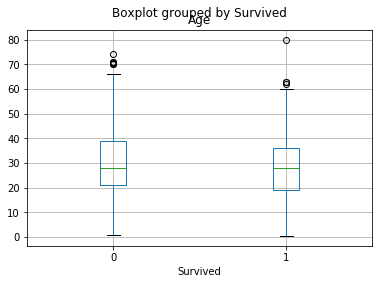

In [11]:
#We zoeken die features die invloed hebben op survived
#Bvb Is er een verband tussen survived (categorisch) en leeftijd (continu)?
#Wij gaan dit grafisch na: boxplot (zie data representatie (deel 2))
titanic_df.boxplot(by = 'Survived', column = 'Age')

In [12]:
#Geen grote verschillen in leeftijd tussen de survivors en niet survivors

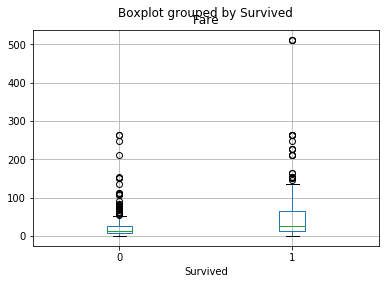

In [13]:
#We zoeken die features die invloed hebben op survived
#Bvb Is een verband tussen survived (categorisch) en fare (continu)?
#Wij gaan dit grafisch na: boxplot
titanic_df[titanic_df.Fare.notnull()].boxplot('Fare', 'Survived')

In [14]:
#Uit deze boxplot zien we geen grote verschillen in Fare wat betreft de Survival

In [15]:
#Speelt het geslacht een rol in surviven? 
#Zoek het verband tussen geslacht (categorisch) en surviven (categorisch)
#Verband tussen 2 categorische variabelen (zie data representatie deel 2) ==> crosstab

In [16]:
#Crosstab met absolute aantallen
pd.crosstab(titanic_df['Sex'], titanic_df['Survived'])

Survived    0    1
Sex               
female     64  195
male      360   93

In [17]:
#Meer vrouwen overleefden de ramp dan mannen
#crosstab met relatieve aantallen
pd.crosstab(titanic_df['Sex'], titanic_df['Survived'], normalize = True)

Survived         0         1
Sex                         
female    0.089888  0.273876
male      0.505618  0.130618

In [18]:
#Speelt 'passengerClass' een rol in surviven
pd.crosstab(titanic_df['Pclass'], titanic_df['Survived'])

Survived    0    1
Pclass            
1          64  120
2          90   83
3         270   85

In [19]:
#Speelt 'passengerClass' een rol in surviven  ==> relatieve aantallen
pd.crosstab(titanic_df['Pclass'], titanic_df['Survived'], normalize = True)


Survived         0         1
Pclass                      
1         0.089888  0.168539
2         0.126404  0.116573
3         0.379213  0.119382

In [20]:
#1ste klas reizigers overleefden meer de ramp... deze passagiers kregen eerst toegang tot de reddingsboten??? 

In [21]:
#is er verband tussen de onderlinge features (correlatie?): corr = getal tussen -1 en 1
#positieve correlatie: variabelen veranderen in dezelfde richting; 
#pclas = neg gecorreleerd met survival (hoe hoger de klasse: 3 hoe lager de overlevingskans)
#enkel numerieke features worden opgenomen in onderstaande tabel
titanic_df_corr = titanic_df.corr()
titanic_df_corr

Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.356462 -0.082446 -0.015523  0.095265  0.266100
Pclass   -0.356462  1.000000 -0.365902  0.065187  0.023666 -0.552893
Age      -0.082446 -0.365902  1.000000 -0.307351 -0.187896  0.093143
SibSp    -0.015523  0.065187 -0.307351  1.000000  0.383338  0.139860
Parch     0.095265  0.023666 -0.187896  0.383338  1.000000  0.206624
Fare      0.266100 -0.552893  0.093143  0.139860  0.206624  1.000000

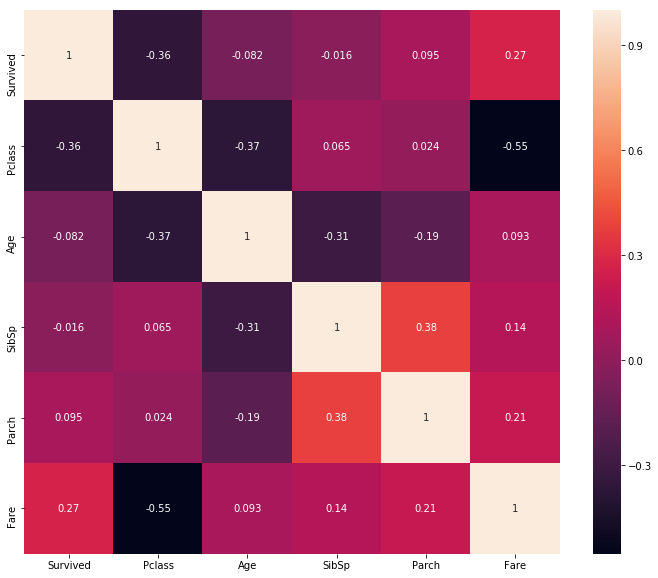

In [22]:
#alternatief om correlatie tussen features na te gaan = heatmap
fig, ax = plt.subplots(figsize = (12, 10))
sns.heatmap(titanic_df_corr, annot = True) # annot = True: de waarden worden getoond in de heatmap
#lichte kleuren: positieve correlatie; donkere kleuren: negatieve correlatie

In [23]:
#dataset klaarmaken voor ML; herinner ML algoritmen hebben numerieke waarden nodig ==> labels vervangen door getallen
#feature 'Sex' = 'female' / 'male ' ==> 0 / 1
#converteer categorische variabelen tot (geordende) numerieke variabelen
#Er bestaan verschillende manieren om dit te doen: de labelencoder wordt veelvuldig gebruikt voor ordinale categorische gegevens
#aangezien we maar 2 categorieën hebben voor geslacht: toch oké om deze te gebruiken

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
titanic_df['Sex'] = label_encoder.fit_transform(titanic_df['Sex'].astype(str))

In [24]:
titanic_df.head() #female = 0 ; male = 1

Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    1  22.0      1      0   7.2500        S
1         1       1    0  38.0      1      0  71.2833        C
2         1       3    0  26.0      0      0   7.9250        S
3         1       1    0  35.0      1      0  53.1000        S
4         0       3    1  35.0      0      0   8.0500        S

In [25]:
#origine waarden van 'Sex' kan je terugvinden via  
label_encoder.classes_

array(['female', 'male'], dtype=object)

In [26]:
#niet geordende kwalitatieve / categorische data kan omgezet worden met one hot encoding
#de categorische variabele embarked = vervangen door 3 discrete variabelen (met waarden 0 en 1)
titanic = pd.get_dummies(titanic_df, columns=['Embarked'])
titanic.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_C  Embarked_Q  \
0         0       3    1  22.0      1      0   7.2500           0           0   
1         1       1    0  38.0      1      0  71.2833           1           0   
2         1       3    0  26.0      0      0   7.9250           0           0   
3         1       1    0  35.0      1      0  53.1000           0           0   
4         0       3    1  35.0      0      0   8.0500           0           0   

   Embarked_S  
0           1  
1           0  
2           1  
3           1  
4           1

In [27]:
#shuffle de dataset
#hier niet zo relevant maar vooral in neurale netwerken ==> voorkom dat algoritme al patronen herkent in data door volgorde
#van observaties bvb alle overlevenden #bovenaan te zetten
titanic = titanic.sample(frac=1).reset_index(drop=True) #frac = 1 ==> hele dataset (als maar een deel ==> 0.5)
#reset index = nieuwe indices zetten; drop = True: de oude indices wegdoen
titanic.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_C  Embarked_Q  \
0         1       1    1  23.0      0      1  63.3583           1           0   
1         0       3    1  47.0      0      0   9.0000           0           0   
2         1       3    1  25.0      0      0   0.0000           0           0   
3         0       3    1  26.0      0      0   7.8958           0           0   
4         0       3    1  22.0      0      0   7.2292           1           0   

   Embarked_S  
0           0  
1           1  
2           1  
3           1  
4           0

In [28]:
#wegschrijven naar een csv bestand 
titanic.to_csv('titanic_train_df_klaar.csv', index = False) #geen indices opnemen in die csv file vandaar index = False
titanic_ML = pd.read_csv('titanic_train_df_klaar.csv')

In [29]:
#We splitsen onze dataset op in "train" en "test" (80% train en 20% test); verder zetten we income (x) en outcome (y) apart
from sklearn.model_selection import train_test_split
X = titanic_ML.drop('Survived', axis=1)
y = titanic_ML['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#train_test_split shuffles de data al; was dus niet nodig; we houden 20% om straks te testen


In [30]:
X_train.shape, y_train.shape

((569, 9), (569,))

In [31]:
print(X_train.head())

     Pclass  Sex   Age  SibSp  Parch    Fare  Embarked_C  Embarked_Q  \
219       2    1  24.0      0      0  10.500           0           0   
433       2    0  24.0      1      2  65.000           0           0   
633       3    1  26.0      1      2  20.575           0           0   
438       1    1  29.0      1      0  66.600           0           0   
292       3    1  44.0      0      1  16.100           0           0   

     Embarked_S  
219           1  
433           1  
633           1  
438           1  
292           1  


In [32]:
X_test.shape, y_test.shape

((143, 9), (143,))

In [33]:
#Logistic regression voor classificatie op titanic_ML
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(penalty= 'l2', C=1, solver='liblinear').fit(X_train, y_train)
#penalty= standaard waarde als straf voor een complex model (Ml: beter simpel model en minder accuraat dan complex model met
#teveel features)
#algoritme gebruikt om te optimaliseren = liblinear: werkt goed op kleine datasets

In [34]:
#voorspel
y_pred = logistic_model.predict(X_test)

In [35]:
#hoe goed is onze voorspelling?
#zet even de data in een dataframe om ze naast mekaar te bekijken (niet noodzakelijk)
pred_results = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
pred_results.head(10)

y_test  y_pred
163       1       1
576       0       0
208       1       0
612       0       1
332       0       0
364       0       0
53        0       0
447       0       0
274       1       1
455       1       0

In [36]:
#objectieve manier nodig om accuraatheid te controleren
titanic_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)
titanic_crosstab
#meeste waarden in de true positive en true negative area

y_test   0   1
y_pred        
0       76  14
1       10  43

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


In [38]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('accuracy score', acc) #hoeveel van de voorspelde waarden heeft het model juist?
print('precision score', prec) #hoeveel van de echte overlevers heeft het model ook als overleefd voorspeld
print('recall score', recall) #hoeveel van de passagiers dat het model dacht die overleefden, overleefden ook

accuracy score 0.8321678321678322
precision score 0.8113207547169812
recall score 0.7543859649122807


In [39]:
#hetzelfde kan ook berekend worden uit de crosstab
titanic_crosstab

y_test   0   1
y_pred        
0       76  14
1       10  43

In [40]:
TP = titanic_crosstab[1][1] #True Positve
TN = titanic_crosstab[0][0] #True Negative
FN = titanic_crosstab[1][0] 
FP = titanic_crosstab[0][1]  

In [42]:
acc_score_controle = (TP + TN) / (TP + TN + FP + FN)
prec_score_controle = TP / (TP + FP)   #(36 / 36 + 18)
rec_score_controle = TP / (TP + FN) #(36 / 36 + 11)
print(acc_score_controle)
print(prec_score_controle)
print(rec_score_controle)

0.8321678321678322
0.8113207547169812
0.7543859649122807


In [2]:
#extra uitleg over functies...
from sklearn.model_selection import train_test_split
?train_test_split